In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Common_Functions as cmn
import math
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

In [3]:
def init_df():
    df_MAIN = pd.read_csv(cmn.PATH_df_no_NAN_99p)
    df_MAIN_cleaned = df_MAIN.dropna()

    return df_MAIN_cleaned

In [4]:

def CustomRegression_upper(df, size_list, condition_list):

    # load dataframe with all data
    current_df = df    
    #dictionary of results corresponding to each condition
    perCondition = {}

    #takes each condition and 
    for condition in condition_list:
        #create dataframe to house results
        results = pd.DataFrame({'number': size_list, 'mse': [0]*len(size_list), 'r2': [0]*len(size_list)})
        for idx in range (len(size_list)):
            results['number'][idx] = size_list[idx]
            top_n_df = current_df.loc[current_df.groupby('Region of Headquarters')[condition].nlargest(size_list[idx]).reset_index()['level_1']]
            #top_n_df = current_df.groupby('Region of Headquarters').apply(lambda x: x.nlargest(size_list[idx], condition)).reset_index(drop=True)
            top_n_df_reg = top_n_df[[   'Total Return',
                                        'Revenue - Mean',
                                        'Earnings Per Share - Mean',
                                        'Return On Equity - Mean',
                                        'Volume',
                                        'Company Market Cap',
                                        'EBITDA - Mean',
                                        'ESG Score']]
            X = top_n_df_reg.drop('ESG Score',axis =1)
            y = top_n_df_reg['ESG Score']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
            regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
            regr.fit(X_train, y_train.values.ravel())
            predictions = regr.predict(X_test)
            # Mean squared error (MSE)
            results['mse'][idx] = mean_squared_error(y_test.values.ravel(), predictions)
            # R-squared scores
            results['r2'][idx] = r2_score(y_test.values.ravel(), predictions)

        perCondition[condition] = results
    
    return perCondition
        
    


In [5]:
n = [5, 10, 20, 50, 100, 150, 200, 250]
conditioning_feature = ['Company Market Cap', 'Return On Equity - Mean', 'EBITDA - Mean']
df = init_df()

results_ = CustomRegression_upper(df, n, conditioning_feature)
df

C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1953818744.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][idx] = r2_score(y_test.values.ravel(), predictions)
C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1953818744.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][idx] = size_list[idx]
C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1953818744.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Unnamed: 0,ISIN,Year,Total Return,ESG Score,ESG Combined Score,ESG Controversies Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score,...,Return On Equity - Mean,Volume,Company Market Cap,EBITDA - Mean,Country of Headquarters,Region of Headquarters,TRBC Industry Name,TRBC Industry Group Name,TRBC Business Sector Name,TRBC Economic Sector Name
0,2,DK0010244508,2002,-4.703688,10.732601,10.732601,100.0,16.469428,16.153846,0.000000,...,18.19000,0.0,5.201496e+10,1.929737e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
1,3,DK0010244508,2003,78.725725,16.933543,16.933543,100.0,19.033531,34.523810,0.000000,...,17.60000,0.0,1.828570e+11,6.631311e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
2,4,DK0010244508,2004,6.899061,17.855846,17.855846,100.0,20.465337,26.862745,7.523148,...,20.58450,0.0,1.980218e+11,8.512478e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
3,5,DK0010244508,2005,45.463359,16.395483,16.395483,100.0,20.152244,17.166667,11.683007,...,19.76857,0.0,2.821975e+11,8.136144e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
4,6,DK0010244508,2006,-17.550102,18.732474,18.732474,60.0,20.633013,25.500000,11.033951,...,12.20555,0.0,2.292305e+11,9.496474e+09,Denmark,Europe,Marine Freight & Logistics,Freight & Logistics Services,Transportation,Industrials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,206903,FR0013326246,2007,-16.521731,73.652381,73.652381,100.0,70.885382,79.110106,71.201105,...,4.41960,139980.0,1.224555e+10,7.267190e+08,France,Europe,Commercial REITs,Residential & Commercial REITs,Real Estate,Real Estate
50732,206904,FR0013326246,2008,-25.198536,84.186496,84.186496,100.0,83.021801,83.587662,85.637085,...,5.50871,157713.0,8.731300e+09,1.167809e+09,France,Europe,Commercial REITs,Residential & Commercial REITs,Real Estate,Real Estate
50733,206905,FR0013326246,2009,52.077456,84.563936,84.563936,100.0,69.027935,93.087604,89.760716,...,6.93050,114295.0,1.402267e+10,1.242782e+09,France,Europe,Commercial REITs,Residential & Commercial REITs,Real Estate,Real Estate
50734,206906,FR0013326246,2010,16.576909,86.024170,86.024170,100.0,76.478446,91.374089,89.120561,...,8.07888,59252.0,1.357401e+10,1.265007e+09,France,Europe,Commercial REITs,Residential & Commercial REITs,Real Estate,Real Estate


In [6]:
def CustomRegression_all(df, size_list, condition_list):

    # load dataframe with all data
    current_df = df    
    #dictionary of results corresponding to each condition
    perCondition = {}

    #takes each condition and 
    for condition in condition_list:
        #create dataframe to house results
        results = pd.DataFrame({'number': size_list, 'mse': [0]*len(size_list), 'r2': [0]*len(size_list)})
        for idx in range (len(size_list)):
            results['number'][idx] = size_list[idx]
            top_n_df = current_df.nlargest(size_list[idx], condition).reset_index(drop=True)
            top_n_df_reg = top_n_df[[   'Total Return',
                                        'Revenue - Mean',
                                        'Earnings Per Share - Mean',
                                        'Return On Equity - Mean',
                                        'Volume',
                                        'Company Market Cap',
                                        'EBITDA - Mean',
                                        'ESG Score']]
            X = top_n_df_reg.drop('ESG Score',axis =1)
            y = top_n_df_reg['ESG Score']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)
            regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
            regr.fit(X_train, y_train.values.ravel())
            predictions = regr.predict(X_test)
            # Mean squared error (MSE)
            results['mse'][idx] = mean_squared_error(y_test.values.ravel(), predictions)
            # R-squared scores
            results['r2'][idx] = r2_score(y_test.values.ravel(), predictions)

        perCondition[condition] = results
    
    return perCondition

In [7]:
n = [50, 100, 200, 500, 1000, 5000]
conditioning_feature = ['Company Market Cap', 'Return On Equity - Mean', 'EBITDA - Mean']
df = init_df()

results_ = CustomRegression_all(df, n, conditioning_feature)


C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1501184855.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['r2'][idx] = r2_score(y_test.values.ravel(), predictions)
C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1501184855.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['number'][idx] = size_list[idx]
C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1501184855.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [8]:
for key, result in results_.items():
    print(key)
    print(result)

Company Market Cap
   number         mse        r2
0      50  342.233098  0.344520
1     100  137.165782  0.663510
2     200  232.578795  0.548681
3     500  305.558921  0.265015
4    1000  351.227480  0.243776
5    5000  298.562052  0.218835
Return On Equity - Mean
   number         mse        r2
0      50  480.670084  0.252598
1     100  490.873545  0.058157
2     200  332.009360  0.282678
3     500  263.522971  0.306744
4    1000  322.068481  0.230741
5    5000  288.682634  0.270941
EBITDA - Mean
   number         mse        r2
0      50  151.443863  0.628971
1     100  202.452337  0.540033
2     200  309.410272  0.262252
3     500  334.312162  0.265556
4    1000  327.625511  0.150863
5    5000  312.381477  0.204043


In [9]:

df_change = pd.read_csv(cmn.PATH_df_no_NAN_99p_YoY).drop(columns="Unnamed: 0")
print(df_change.shape)
print(df_change.columns.tolist())

(41430, 30)
['ISIN', 'Year', 'Total Return', 'ESG Score', 'ESG Combined Score', 'ESG Controversies Score', 'Social Pillar Score', 'Governance Pillar Score', 'Environmental Pillar Score', 'Revenue - Mean', 'Earnings Per Share - Mean', 'Return On Equity - Mean', 'Volume', 'Company Market Cap', 'EBITDA - Mean', 'Country of Headquarters', 'Region of Headquarters', 'TRBC Industry Name', 'TRBC Industry Group Name', 'TRBC Business Sector Name', 'TRBC Economic Sector Name', 'ESG Score YoY change', 'ESG Combined Score YoY change', 'ESG Controversies Score YoY change', 'Social Pillar Score YoY change', 'Governance Pillar Score YoY change', 'Revenue - Mean YoY change', 'Earnings Per Share - Mean YoY change', 'Company Market Cap YoY change', 'EBITDA - Mean YoY change']


In [10]:
def prediction_int(df, feature):
    pred = ((df[feature] > 0).astype(int))
    return pred.astype(int)

In [11]:
feature_cols = df_change.filter(regex='Return|YoY').columns.tolist()
print(feature_cols)

['Total Return', 'Return On Equity - Mean', 'ESG Score YoY change', 'ESG Combined Score YoY change', 'ESG Controversies Score YoY change', 'Social Pillar Score YoY change', 'Governance Pillar Score YoY change', 'Revenue - Mean YoY change', 'Earnings Per Share - Mean YoY change', 'Company Market Cap YoY change', 'EBITDA - Mean YoY change']


In [12]:
df_change_with_classifier = df_change.copy()
for feature in feature_cols:
    df_change_with_classifier[f"{feature} Classified"] = prediction_int(df_change, feature)
    
df_change_with_classifier.shape

(41430, 41)

In [13]:
ESG_List = ['ESG Score',
            'ESG Combined Score',
            'ESG Controversies Score',
            'Social Pillar Score',
            'Governance Pillar Score',
            'ESG Score YoY change',
            'ESG Combined Score YoY change',
            'ESG Controversies Score YoY change',
            'Social Pillar Score YoY change',
            'Governance Pillar Score YoY change']

Financials_List = [ 'Total Return Classified', 
                    'Return On Equity - Mean Classified',                    
                    'Revenue - Mean YoY change Classified',
                    'Earnings Per Share - Mean YoY change Classified',
                    'Company Market Cap YoY change Classified',
                    'EBITDA - Mean YoY change Classified']

In [14]:
def CustomClassifier(X, y_list):
   result = {}
   for y in y_list:
      
      X_train, X_test, y_train, y_test = train_test_split(X, y_list[y], test_size = 0.20, random_state = 101)
      rfc = RandomForestClassifier(n_estimators=100, random_state=42)

      # fit random forest classifier to training data
      rfc.fit(X_train, y_train)

      # make predictions on test data
      y_pred = rfc.predict(X_test)

      # calculate accuracy of predictions
      result[y] = accuracy_score(y_test, y_pred)

   return result   


In [18]:
X = df_change_with_classifier[ESG_List]
y_list = df_change_with_classifier[Financials_List]

results = CustomClassifier(X, y_list)
print(results)

{'Total Return Classified': 0.5966690803765388, 'Return On Equity - Mean Classified': 0.929640357229061, 'Revenue - Mean YoY change Classified': 0.6932174752594739, 'Earnings Per Share - Mean YoY change Classified': 0.5696355298093169, 'Company Market Cap YoY change Classified': 0.5627564566739078, 'EBITDA - Mean YoY change Classified': 0.6466328747284577}


<AxesSubplot: >

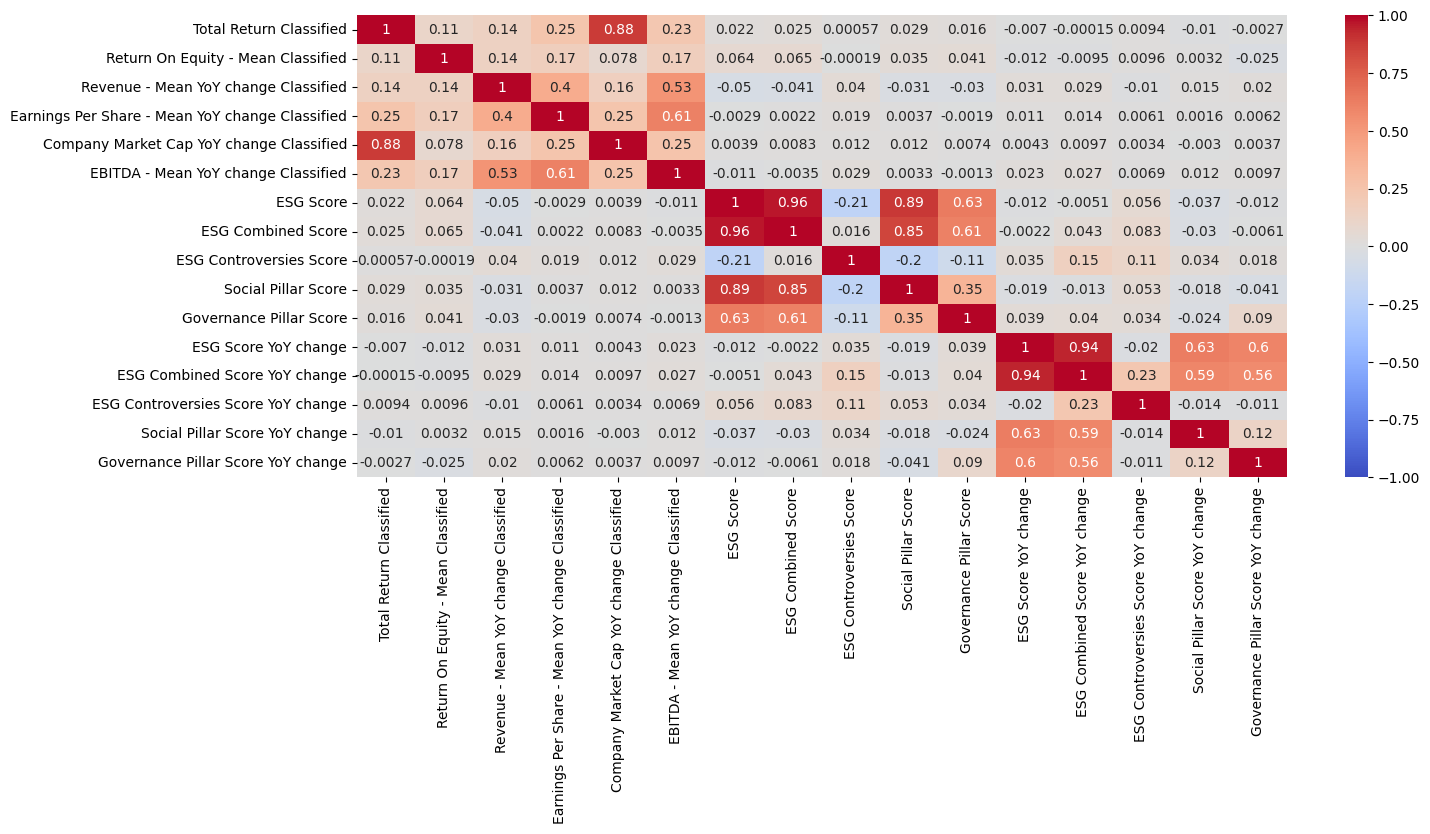

In [17]:
#correlation_df = df_change_with_classifier[Financials_List].corrwith(df_change_with_classifier[ESG_List])
combined_list = Financials_List + ESG_List
correlation_df = df_change_with_classifier[combined_list].corr()
fig, ax = plt.subplots(figsize=(15, 6))
#sns.heatmap(df_change_with_classifier[combined_list], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [20]:
df_change_with_classifier['ISIN']

0        DK0010244508
1        DK0010244508
2        DK0010244508
3        DK0010244508
4        DK0010244508
             ...     
41425    FR0013326246
41426    FR0013326246
41427    FR0013326246
41428    FR0013326246
41429    FR0013326246
Name: ISIN, Length: 41430, dtype: object

In [27]:
combined_list = Financials_List + ESG_List
corr_df = df_change_with_classifier.groupby('ISIN')[combined_list].apply(lambda x: x)


C:\Users\ianpe\AppData\Local\Temp\ipykernel_21468\1629621120.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  corr_df = df_change_with_classifier.groupby('ISIN')[combined_list].apply(lambda x: x)


<AxesSubplot: >

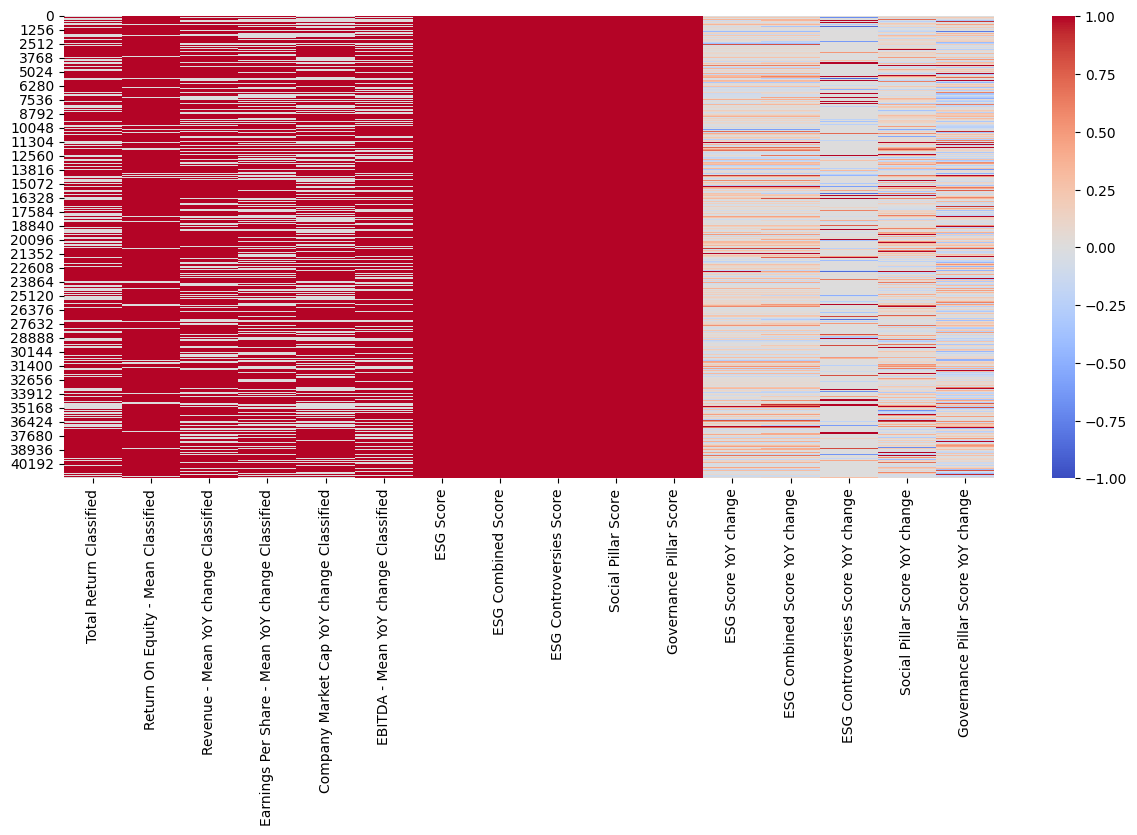

In [28]:
#correlation_df = df_change_with_classifier[Financials_List].corrwith(df_change_with_classifier[ESG_List])

fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corr_df, cmap='coolwarm', vmin=-1, vmax=1)